Dataset : https://www.kaggle.com/datasets/carrie1/ecommerce-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# import data
df = pd.read_csv("/content/drive/My Drive/dataset/Ecommerce Customers.csv")

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


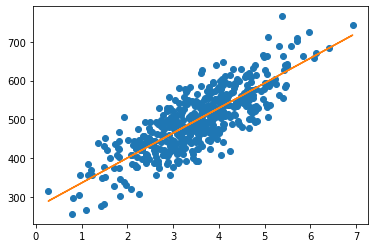

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

x = df['Length of Membership']
y = df['Yearly Amount Spent']
# create scatter plot
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b )

In [ ]:
# get only length of membership & yearly amount spent
df_data = pd.read_csv("/content/drive/My Drive/dataset/Ecommerce Customers.csv", usecols=['Yearly Amount Spent', 'Length of Membership'])
df_data

,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092
...,...,...
495,3.746573,573.847438
496,3.576526,529.049004
497,4.958264,551.620145
498,2.336485,456.469510


In [ ]:
df_data.head()

,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092


In [ ]:
df_data.shape

(500, 2)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Length of Membership  500 non-null    float64
 1   Yearly Amount Spent   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
df_data.describe()

,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000
mean,3.533462,499.314038
std,0.999278,79.314782
min,0.269901,256.670582
25%,2.930450,445.038277
50%,3.533975,498.887875
75%,4.126502,549.313828
max,6.922689,765.518462


In [ ]:
df_data.isnull().sum()

Length of Membership    0
Yearly Amount Spent     0
dtype: int64

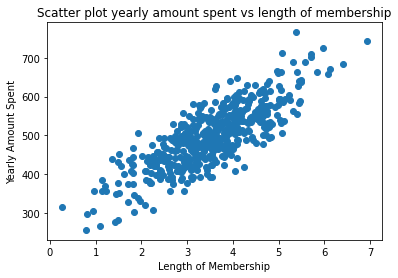

In [ ]:
plt.scatter(df_data['Length of Membership'], df_data['Yearly Amount Spent'])
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Scatter plot yearly amount spent vs length of membership')
plt.show()


In [ ]:
# mengetahui nilai korelasi dari length of membership & yearly amount spent
df_data.corr()

,Length of Membership,Yearly Amount Spent
Length of Membership,1.000000,0.809084
Yearly Amount Spent,0.809084,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# create model data
x = df_data['Length of Membership'].values.reshape(-1,1)
y = df_data['Yearly Amount Spent'].values.reshape(-1,1)

# split data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# membuat object linear regression
lin_reg = LinearRegression()

# training model demngan data training yg sudah displit
lin_reg.fit(x_train, y_train)

# mencari nilai slope / koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[64.89107564]]
[270.48322519]


In [ ]:
# mencari tau accuracy score dari model yg menggunakan data testing
lin_reg.score(x_test, y_test)

0.6222790836811637

Text(0.5, 1.0, 'yearly amount vs length membership')

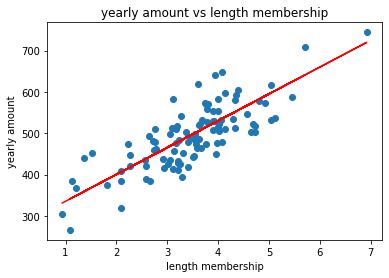

In [ ]:
# visualisasi regression line menggunakan data testing
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('length membership')
plt.ylabel('yearly amount')
plt.title('yearly amount vs length membership')


In [ ]:
# kita membuat prediksi dari model
# prediksi berapa pembelian tahunan jika lama membership selama 1 tahun
lin_reg.predict([[1]])

array([[335.37430083]])